In [1]:
import os;os.getcwd()


'/home/dp/gits2/hms-handler'

In [2]:
from cn_correct import CompareCorrect as CC

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
cc=CC()

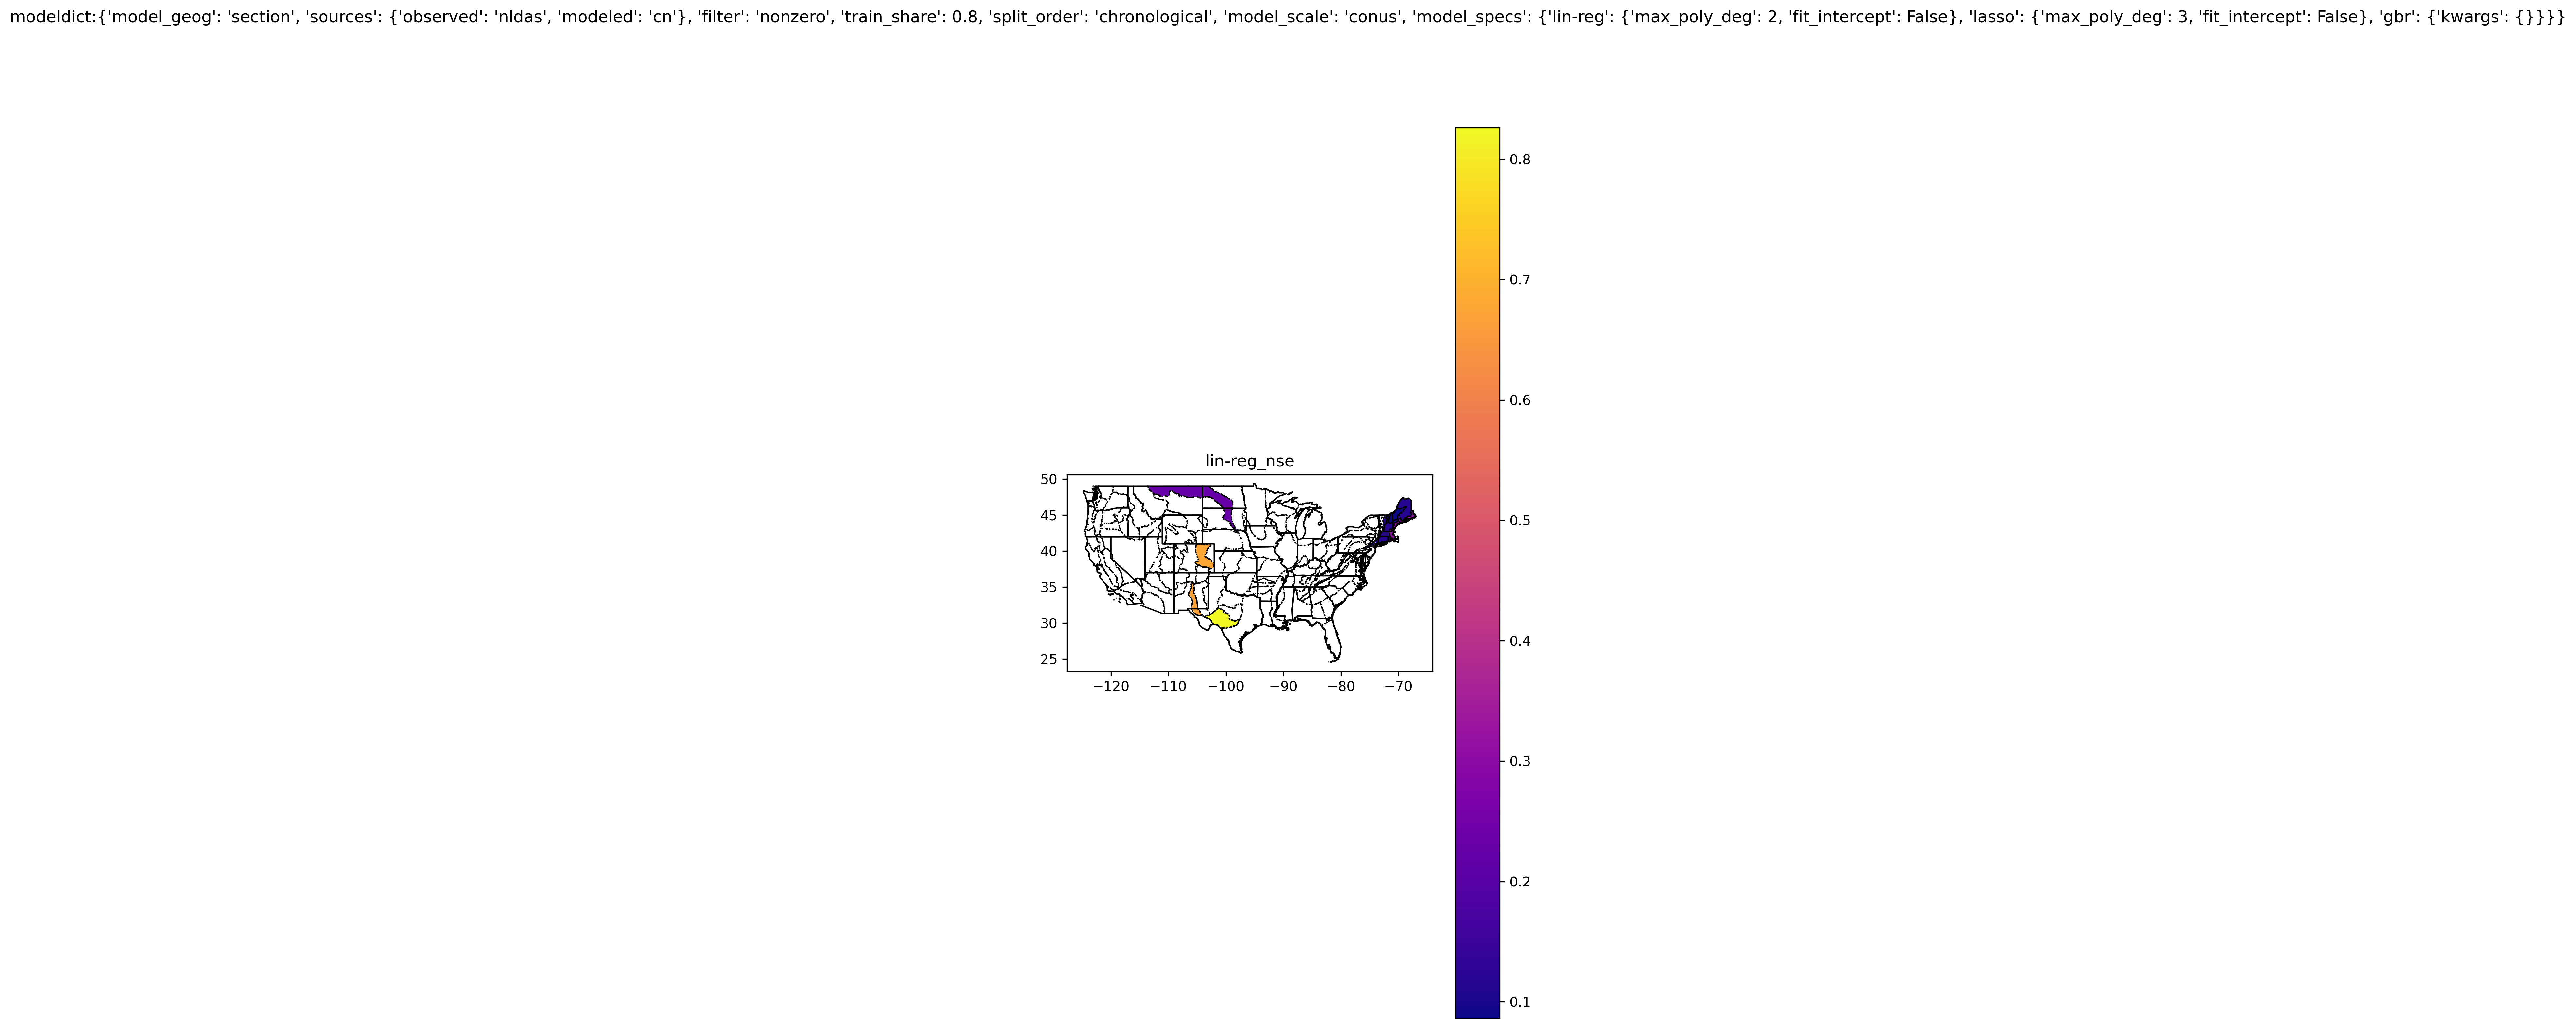

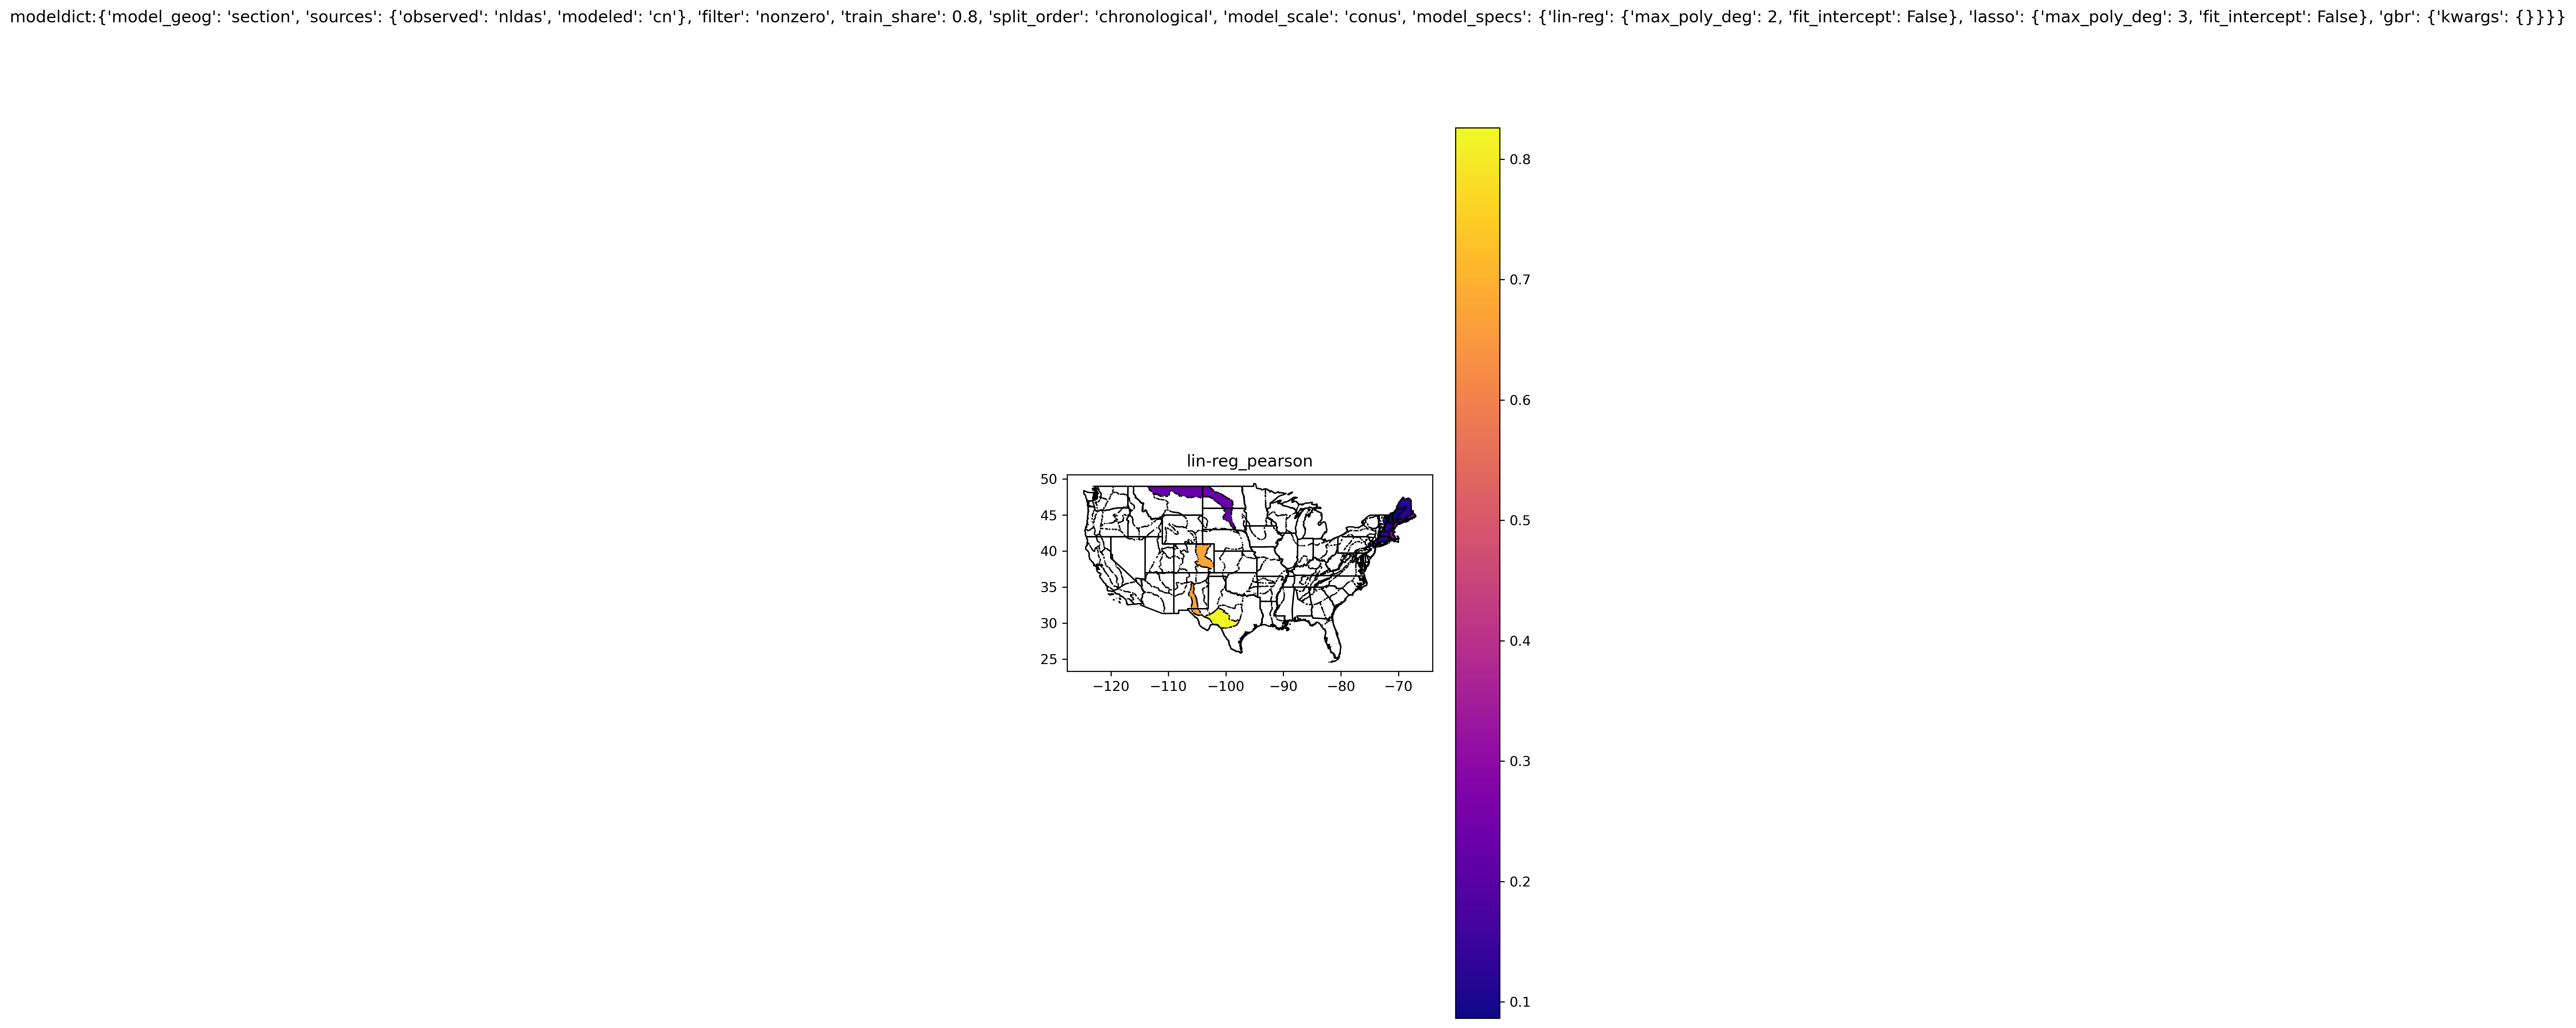

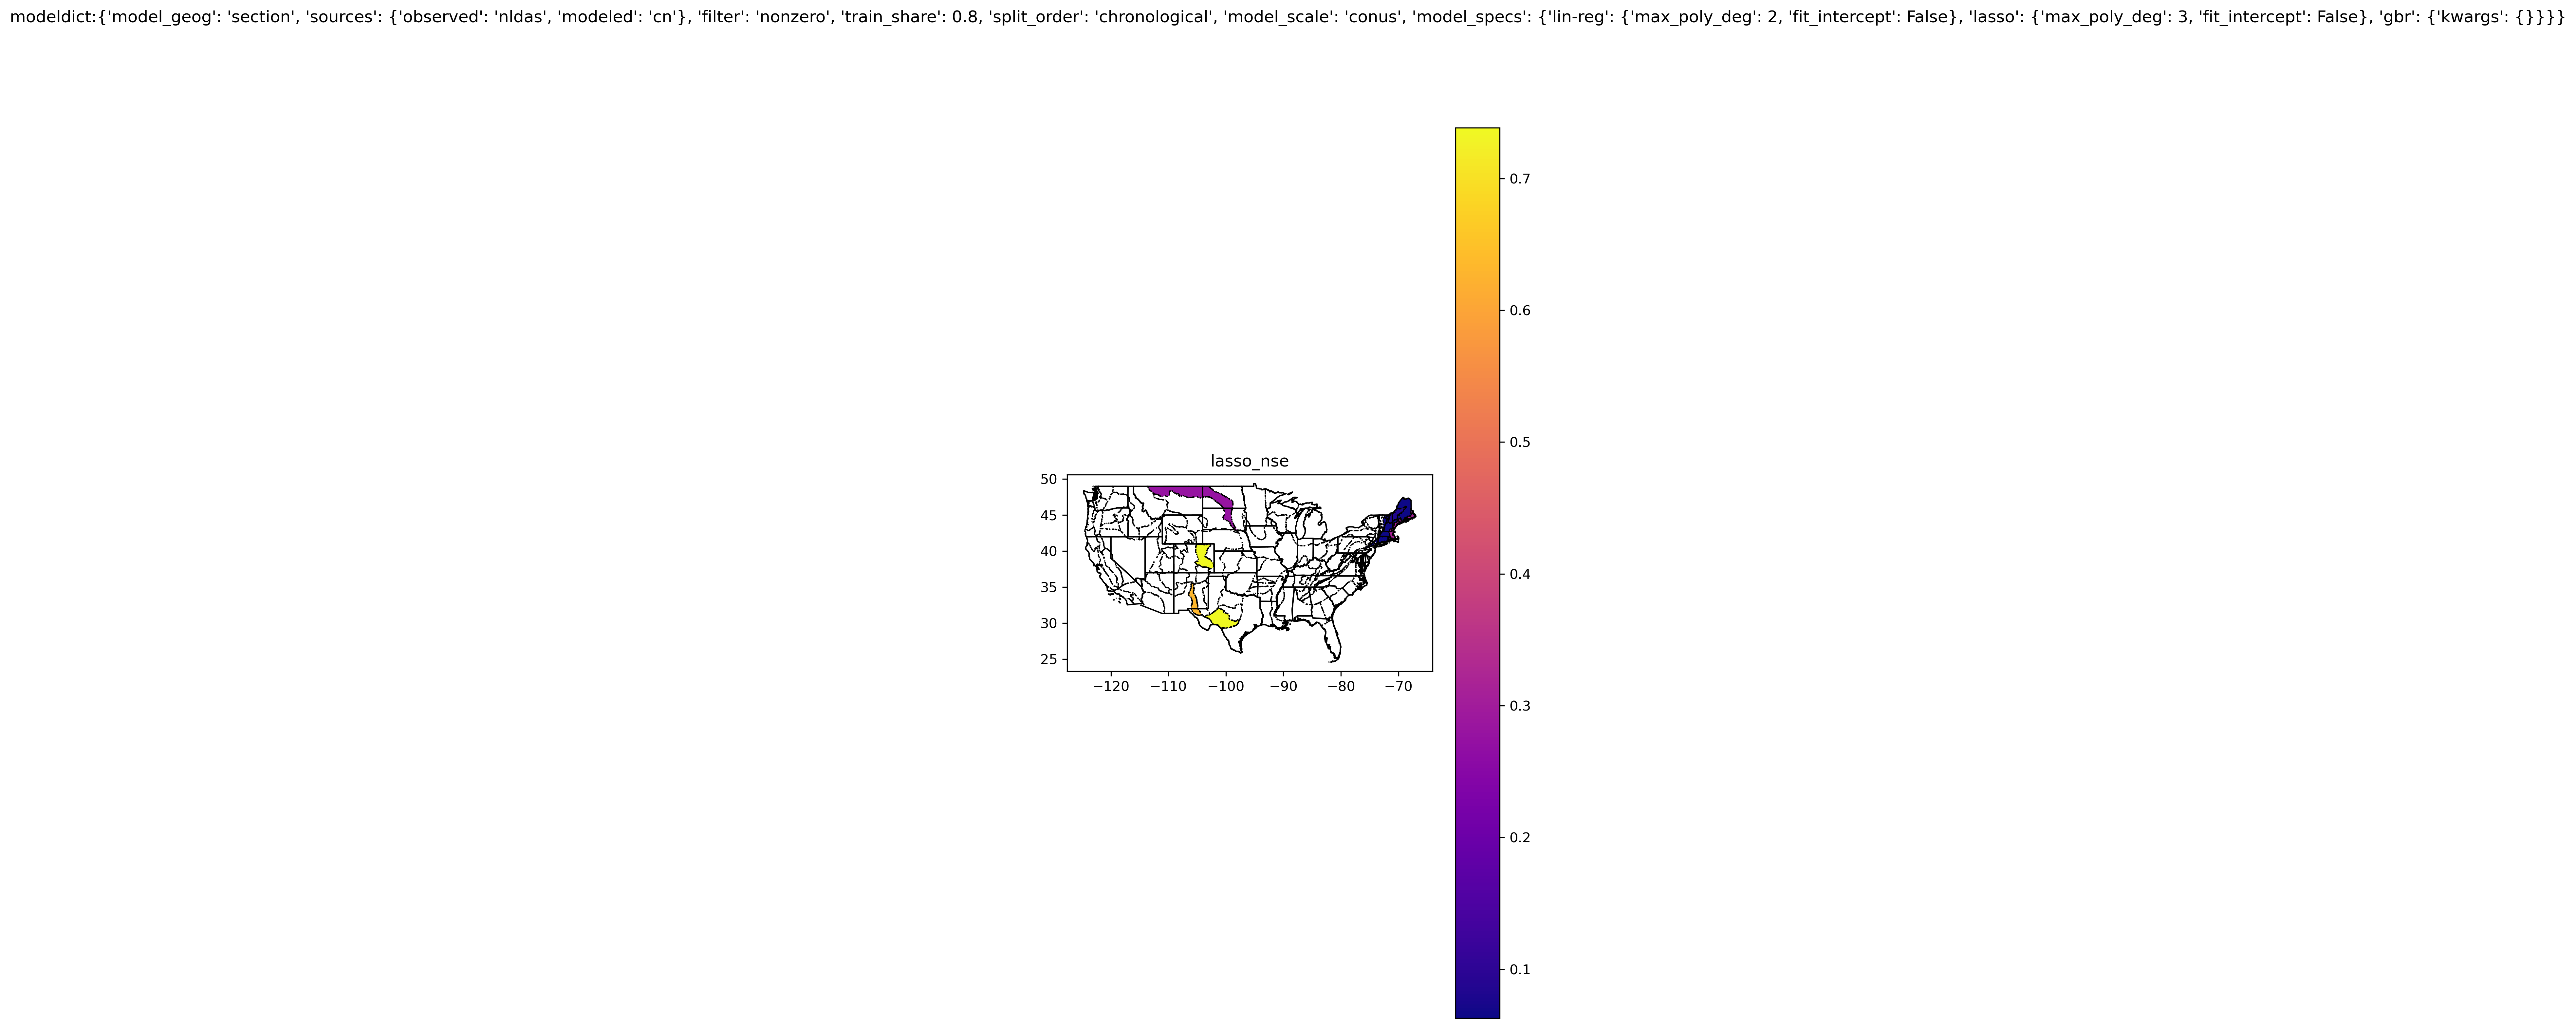

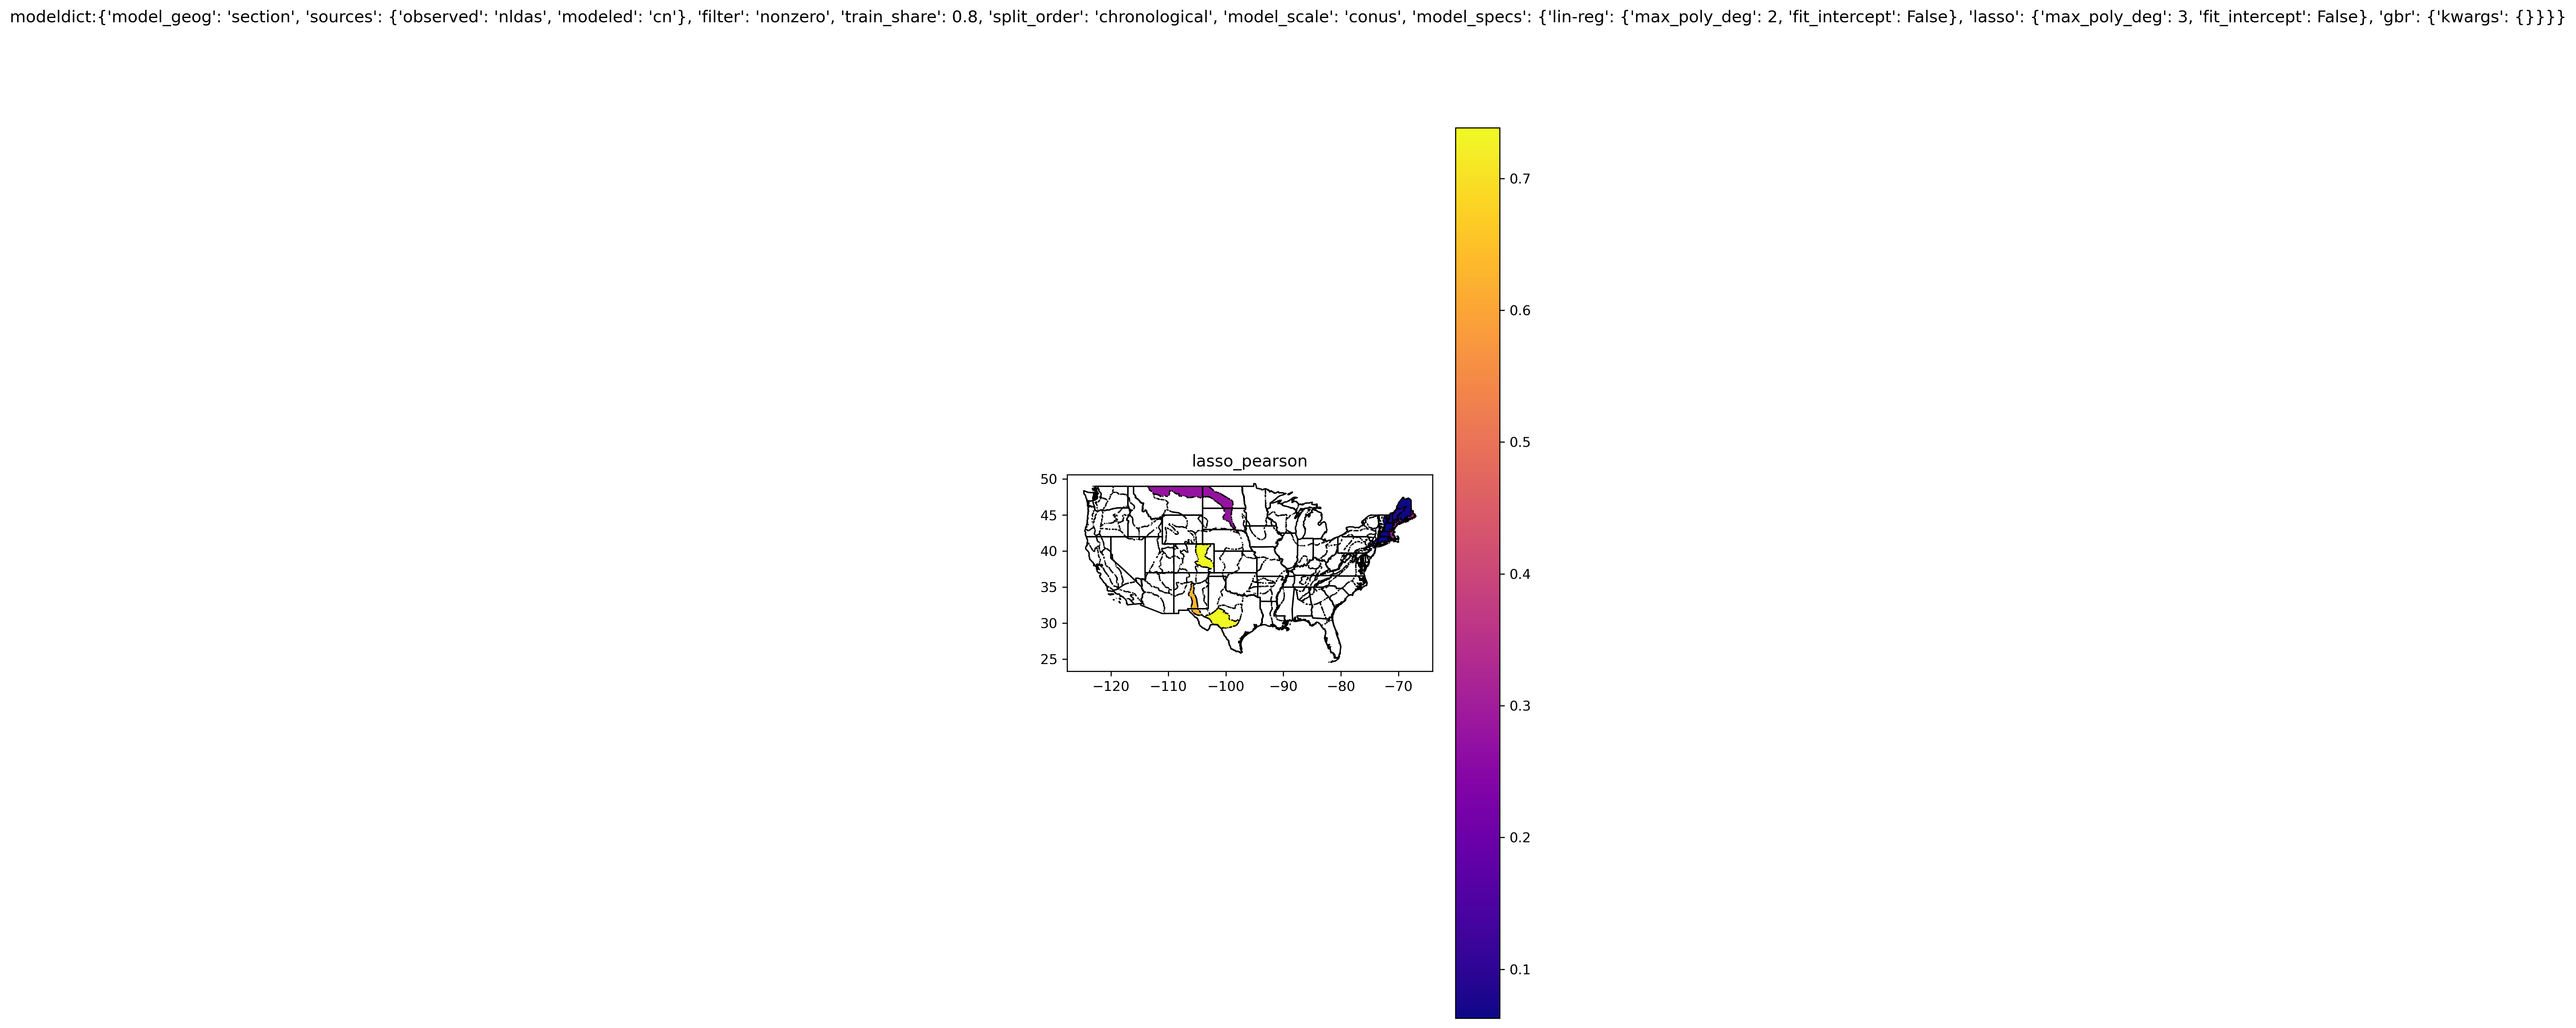

In [ ]:
cc.runBigModel()


In [ ]:
-

In [ ]:
for obj in cc.dc.comid_modeling_objects:
    for m_name, results in obj.test_results.items():
        print(m_name,results['test_stats'].nse)

In [ ]:
cc.dc.big_y_train.loc[20867042]

In [ ]:
-

In [ ]:
cc.dc.onehot.transform(cc.dc.big_x_train_raw.loc[:,cc.dc.obj_cols])

In [ ]:
cc.dc.onehot.get_feature_names(cc.dc.obj_cols)

In [ ]:
list(cc.dc.big_x_train_raw.dtypes.items())

In [ ]:
cc.dc.comid_data_object_dict[5879121].runoff_model_data_df

In [ ]:
cc.dc.comid_geog_dict

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cc.comid_physio[cc.comid_physio.loc[:,'section'].isna()].to_csv('missing_section.csv')

In [ ]:
cc.comid_physio.isnull().any(axis=0)

In [ ]:
cc.modeldict['filter']='nonzero'
cc.modeldict

In [ ]:
cc.runModelCorrection(try_load=False)

In [ ]:
cc.modeldict['filter']='none'
cc.runModelCorrection(try_load=False)